In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
import math as m
import matplotlib.pyplot as plt


Implementation of the different parameters of the equation

In [ ]:
#phi=0.99
#alphah=1.02
#sigma=14000.0 parameters for an ISOREL wall

phi=0.94
alphah=1
sigma=9067 #parameters for an IFTH wall

gammap=7/5
c0=331.0 #sound velocity in the air
rho0=1.293 #density of the air
#air parameters
xi0=1/(c0**2)
eta0=1.0
#porous wall parameters
xi1=phi*gammap/c0**2
a=sigma*(phi**2)*gammap/((c0**2)*rho0*alphah)
eta1=phi/alphah
def xiwall(omega):
  return xi1(1+a*1j/(xi1*omega))
A=1
B=1
L=5
y_grid=10 #L divided by the size of the grid

#Implementation of the fourier modes of g1 g2 g3

def g1(k,w):
  if k==np.pi/L:
    return 1/(2j)
  elif k==-np.pi/L:
    return-1/2j
  else :
    return 0
def h(y,omega,k):
  return np.exp(-y**2-1j*omega*k)

def g2(k,w):
  return quad(lambda y:h(y,w,k), 0, 2*L)[0]/(2*L)

def g3(k,w):
  if k==0:
    return 1
  else:
    return 0


Implementation of the error fonction e(α)

In [ ]:
def lambda0(k,w):
    cte=k**2-(xi0/eta0)*(w**2)
    if cte>=0:
        return np.sqrt(cte)
    else : return 1j*np.sqrt(-cte)

def lambda1(k,w):
    cte=k**2-(xi0/eta0)*(w**2)
    r_1 = np.sqrt(cte + np.sqrt(cte**2 + (a * w/eta1)**2))
    r_2 = np.sqrt(-cte + np.sqrt(cte**2 + (a * w/eta1)**2))
    return (r_1 - 1j * r_2)/np.sqrt(2)

def f(x,k,w):
    l_0=lambda0(k,w)
    return(l_0*eta0-x)*np.exp(-l_0*L)+(l_0*eta0+x)*np.exp(l_0*L)

def chi_func(g,k,alpha,w):
    l_0=lambda0(k,w)
    l_1=lambda1(k,w)
    return g(k,0)*(((l_0*eta0-l_1*eta1)/f(l_1*eta1,k,w))-((l_0*eta0-alpha)/f(alpha,k,w)))

def gamma_func(g,k,alpha,w):
    l_0=lambda0(k,w)
    l_1=lambda1(k,w)
    return g(k,0)*(((l_0*eta0+l_1*eta1)/f(l_1*eta1,k,w))-((l_0*eta0+alpha)/f(alpha,k,w)))

def e(g,k,alpha,w): #implementation of the e_k coefficient using the gk function
    coef = A + B * abs(k) ** 2
    l_0=lambda0(k,w)
    l_1=lambda1(k,w)
    gamma=gamma_func(g,k,alpha,w)
    chi=chi_func(g,k,alpha,w)
    cte = k**2 - xi1/eta1 * w**2
    expo = np.exp(2 * l_0 * L)
    prod = chi * gamma.conjugate()
    if cte >= 0:
        sub = abs(chi) ** 2 * (1 - 1/expo) + abs(gamma) ** 2 * (expo - 1)
        terme_1 = coef * (1/(2*l_0) * sub + 2 * L * prod.real)
        terme_2 = B * l_0/2 * sub - 2 * B * l_0 ** 2 * L * prod.real
        return terme_1 + terme_2
    else:
        sum = L * (abs(chi)**2 + abs(gamma)**2)
        sub = (prod * (1 - 1/expo)).imag
        return coef * (sum + 1/l_0 * 1j * sub) + B * abs(l_0)**2 * sum + 1j * B * l_0 * sub


def e_sum(g,alpha_vect,w):
    """Somme les erreurs correspondant aux différentes harmoniques de résolution spatiale"""
    sum=0
    for i in range(-y_grid, y_grid+1):
        k=i*np.pi/L
        sum+=e(g,k,alpha_vect[0]+1j*alpha_vect[1],w)
    return sum


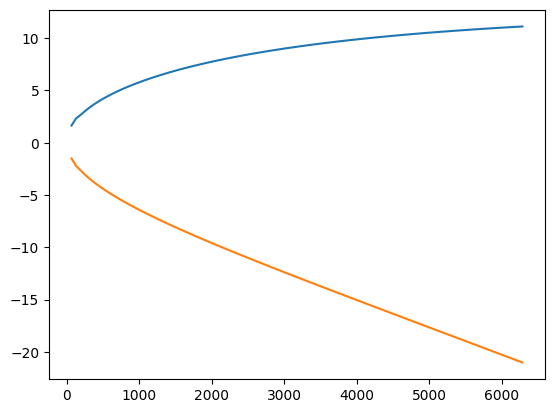

In [ ]:
omegalist=np.linspace(2*np.pi*10,2*np.pi*1000,100)
alphare1=[]
alphaim1=[]
def eg1(alpha,omega):
  return e_sum(g1,alpha,omega)
for omega in omegalist:
  def eg1min(alpha):
    return eg1(alpha,omega)
  init=[0,0]
  resultat = minimize(eg1min, init, method='BFGS')
  alphare1.append(resultat.x[0])
  alphaim1.append(resultat.x[1])
plt.plot(omegalist,alphare1,label='partie réelle')
plt.plot(omegalist,alphaim1,label='partie imaginaire')
plt.show()

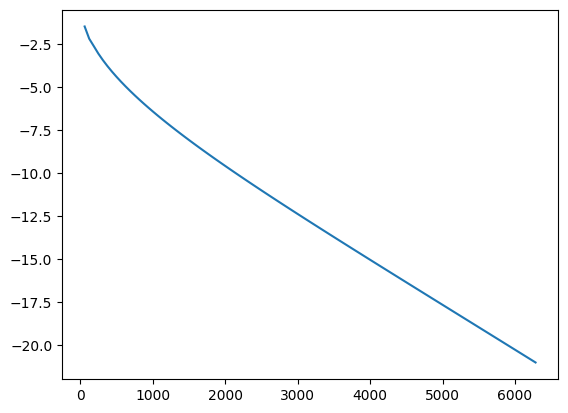

In [ ]:
plt.plot(omegalist,alphaim1,label='partie imaginaire')
plt.show()

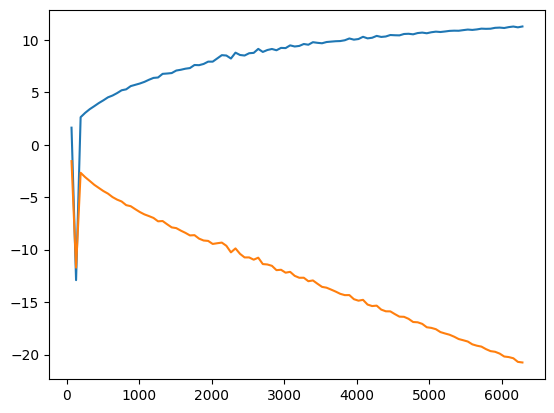

In [ ]:
alphare2=[]
alphaim2=[]
def eg2(alpha,omega):
  return e_sum(g2,alpha,omega)
for omega in omegalist:
  def eg2min(alpha):
    return eg2(alpha,omega)
  init=[0,0]
  resultat = minimize(eg2min, init, method='BFGS')
  alphare2.append(resultat.x[0])
  alphaim2.append(resultat.x[1])
plt.plot(omegalist,alphare2,label='partie réelle')
plt.plot(omegalist,alphaim2,label='partie imaginaire')
plt.show()

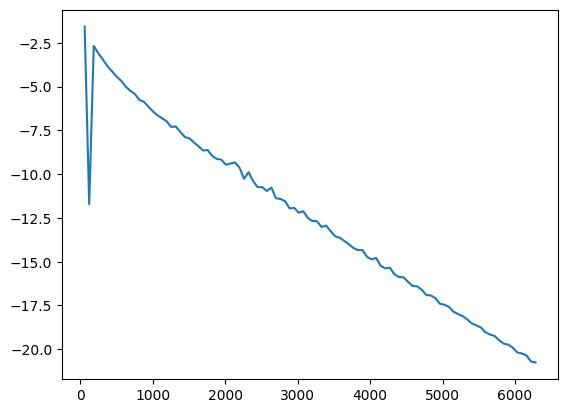

In [ ]:
plt.plot(omegalist,alphaim2,label='partie imaginaire')
plt.show()

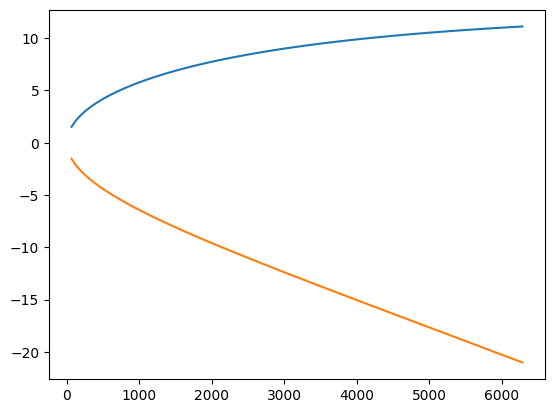

In [ ]:
alphare3=[]
alphaim3=[]
def eg3(alpha,omega):
  return e_sum(g3,alpha,omega)
for omega in omegalist:
  def eg3min(alpha):
    return eg3(alpha,omega)
  init=[0,0]
  resultat = minimize(eg3min, init, method='BFGS')
  alphare3.append(resultat.x[0])
  alphaim3.append(resultat.x[1])
plt.plot(omegalist,alphare3,label='partie réelle')
plt.plot(omegalist,alphaim3,label='partie imaginaire')
plt.show()

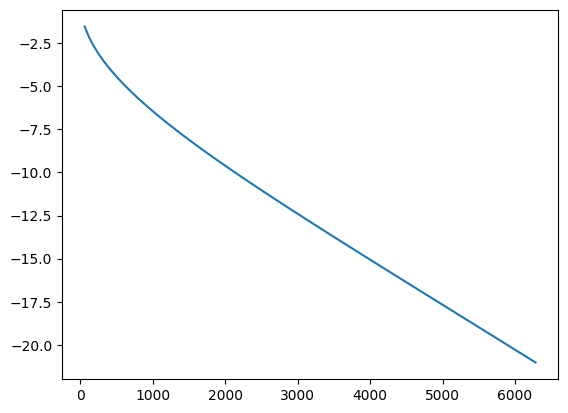

In [ ]:
plt.plot(omegalist,alphaim3,label='partie imaginaire')
plt.show()